In [1]:
#IMPORTING LIBRARIES
from layers import *
from models import *
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# XOR input and output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])


In [24]:
# For sigmoid activations in both hidden layer and ouput layer
model_sigmoid = Sequential([
    Linear(2, 2),
    Sigmoid(),
    Linear(2, 1),
    Sigmoid()
])

# For tanh activation in the hidden layer and sigmoid in the output layer
model_tanh = Sequential([
    Linear(2, 2),
    Tanh(),
    Linear(2, 1),
    Sigmoid()
])

In [25]:
def train(model, inputs, targets, iterations=11000, learning_rate=0.01):
    loss_function = BinaryCrossEntropy()
    for epoch in range(iterations):
        # Forward pass
        predictions = model.forward(inputs)
        # Calculate the loss
        loss = loss_function.forward(predictions, targets)

        # Backward pass
        gradient = loss_function.backward()
        model.backward(gradient)

        # Update weights and biases
        for layer in model.layers:
            if isinstance(layer, Linear):
                layer.weights -= learning_rate * layer.gradient_weights
                layer.biases -= learning_rate * layer.gradient_biases

        if epoch % 500 == 0:
            print(f'Epoch {epoch}/{iterations}, Loss: {loss}')

In [26]:
def evaluate(model, inputs):
    #Compute predictions
    predictions = model.forward(inputs)
    return predictions

In [27]:
def save_model_weights(model, file_path):
    weights_and_biases = [(layer.weights, layer.biases) for layer in model.layers if isinstance(layer, Linear)]
    # Save weights and biases 
    with open(file_path, 'wb') as file:
        pickle.dump(weights_and_biases, file)

In [28]:
# Training the models
train(model_sigmoid, X, y)



Epoch 0/11000, Loss: 2.898817444550785
Epoch 500/11000, Loss: 2.6607900720052706
Epoch 1000/11000, Loss: 2.585965268401021
Epoch 1500/11000, Loss: 2.497292678115335
Epoch 2000/11000, Loss: 2.4055512639857715
Epoch 2500/11000, Loss: 2.3204871137784955
Epoch 3000/11000, Loss: 2.2448806001196795
Epoch 3500/11000, Loss: 2.175670328288727
Epoch 4000/11000, Loss: 2.108055836383273
Epoch 4500/11000, Loss: 2.0390060597369306
Epoch 5000/11000, Loss: 1.9682236709773444
Epoch 5500/11000, Loss: 1.8977486921772202
Epoch 6000/11000, Loss: 1.831185620523978
Epoch 6500/11000, Loss: 1.7718200510573183
Epoch 7000/11000, Loss: 1.7209992893372597
Epoch 7500/11000, Loss: 1.678309836501906
Epoch 8000/11000, Loss: 1.6426103555429425
Epoch 8500/11000, Loss: 1.6127150406059756
Epoch 9000/11000, Loss: 1.5876038059485693
Epoch 9500/11000, Loss: 1.5664324521233879
Epoch 10000/11000, Loss: 1.5485046006714605
Epoch 10500/11000, Loss: 1.5332468872777685


In [29]:
train(model_tanh, X, y)


Epoch 0/11000, Loss: 3.296231210713087
Epoch 500/11000, Loss: 2.141882215167626
Epoch 1000/11000, Loss: 1.1019146732634306
Epoch 1500/11000, Loss: 0.4947136964282439
Epoch 2000/11000, Loss: 0.2974700338796311
Epoch 2500/11000, Loss: 0.208762515311811
Epoch 3000/11000, Loss: 0.15959241132260915
Epoch 3500/11000, Loss: 0.1286751197494044
Epoch 4000/11000, Loss: 0.10755559466849732
Epoch 4500/11000, Loss: 0.09226350189251967
Epoch 5000/11000, Loss: 0.08070354880730024
Epoch 5500/11000, Loss: 0.07167091274775102
Epoch 6000/11000, Loss: 0.06442580895181932
Epoch 6500/11000, Loss: 0.05848984400666371
Epoch 7000/11000, Loss: 0.053540414940002515
Epoch 7500/11000, Loss: 0.049352315717208925
Epoch 8000/11000, Loss: 0.0457636983363954
Epoch 8500/11000, Loss: 0.0426553359485055
Epoch 9000/11000, Loss: 0.03993750786534714
Epoch 9500/11000, Loss: 0.03754143384445359
Epoch 10000/11000, Loss: 0.03541352106621068
Epoch 10500/11000, Loss: 0.033511404353856314


In [30]:
# Testing and displaying results
print("Testing with Sigmoid model:")
print(evaluate(model_sigmoid, X))

print("Testing with Tanh model:")
print(evaluate(model_tanh, X))

# Saving the model weights
save_model_weights(model_sigmoid, "XOR_solved_sigmoid.w")
save_model_weights(model_tanh, "XOR_solved_tanh.w")

Testing with Sigmoid model:
[[0.05828973]
 [0.97367439]
 [0.47214669]
 [0.4948945 ]]
Testing with Tanh model:
[[0.0059312 ]
 [0.98970085]
 [0.98958276]
 [0.00501526]]


### In your notebook, describe which one was easier to train for this problem.


##### Tanh activation functions generally outperform sigmoid in XOR problem training because of their zero-centered outputs and larger gradients. These advantages allow for faster learning of XOR's non-linear patterns and reduce the impact of the vanishing gradient problem, resulting in more efficient and effective training results.

# Predicting Trip Duration

In [2]:
import numpy as np
import pandas as pd

dataset = np.load("nyc_taxi_data.npy", allow_pickle=True).item()
X_train, y_train, X_test, y_test = dataset["X_train"], dataset["y_train"], dataset["X_test"], dataset["y_test"]

X_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
879655,id2425795,1,2016-01-08 23:55:11,2016-01-09 00:04:32,1,-73.955551,40.773346,-73.973640,40.763500,N
646838,id0767831,2,2016-03-05 09:52:06,2016-03-05 10:00:12,1,-73.962181,40.763599,-73.980377,40.764919,N
1138713,id0449104,1,2016-04-09 16:03:53,2016-04-09 16:21:22,1,-73.977486,40.751842,-74.011688,40.718925,N
864716,id3030157,1,2016-01-06 11:12:44,2016-01-06 11:19:49,1,-73.970001,40.762363,-73.963264,40.774666,N
434927,id1584885,1,2016-06-26 09:10:56,2016-06-26 09:17:44,1,-73.950348,40.771561,-73.968178,40.762409,N


In [3]:
X_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06
mean,1.534878e+00,1.664126e+00,-7.397350e+01,4.075093e+01,-7.397342e+01,4.075181e+01
std,4.987823e-01,1.313950e+00,7.351224e-02,3.291198e-02,7.316118e-02,3.579324e-02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01
75%,2.000000e+00,2.000000e+00,-7.396734e+01,4.076835e+01,-7.396302e+01,4.076980e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01


## Data Preprocessing

In [4]:
def find_haversine_distance(lat1, lng1, lat2, lng2):
    # to calculate haversine distance
    AVG_EARTH_RADIUS = 6371
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    
    d_lat = lat2 - lat1
    d_lng = lng2 - lng1

    # Compute Haversine distance
    a = np.sin(d_lat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_lng / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    hd = AVG_EARTH_RADIUS * c

    return hd

def convert_time_format(dataFrame):
    dataFrame['pickup_datetime'] = pd.to_datetime(dataFrame['pickup_datetime'])
    # Extract month, week, weekday, hour, and minute from 'pickup_datetime'
    dataFrame['month'] = dataFrame['pickup_datetime'].dt.month
    dataFrame['week'] = dataFrame['pickup_datetime'].dt.isocalendar().week
    dataFrame['weekday'] = dataFrame['pickup_datetime'].dt.weekday
    dataFrame['hour'] = dataFrame['pickup_datetime'].dt.hour
    dataFrame['minute'] = dataFrame['pickup_datetime'].dt.minute

def calculate_distance_haversine(dataFrame):
    # Calculate Haversine distance
    dataFrame['distance_km'] = find_haversine_distance(dataFrame['pickup_latitude'], dataFrame['pickup_longitude'], dataFrame['dropoff_latitude'], dataFrame['dropoff_longitude'])

def encode_store_and_fwd(dataFrame):
    # Map 'Y' to 1 and 'N' to 0
    dataFrame['store_and_fwd_flag'] = dataFrame['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

def preprocess(dataFrame):
    # Convert time-related features
    convert_time_format(dataFrame)
    # Calculate Haversine distance
    calculate_distance_haversine(dataFrame)
    # Encode 'store_and_fwd_flag'
    encode_store_and_fwd(dataFrame)
    # Drop rows with missing values
    dataFrame.dropna(inplace=True)
    return dataFrame


In [5]:
#Preprocess of dataframe
for df in [X_train, X_test]:
    preprocess(df)

X_test.drop(columns=['id','dropoff_datetime','pickup_datetime'], axis=1, inplace=True)
X_train.drop(columns=['id', 'dropoff_datetime', 'pickup_datetime'], axis=1, inplace=True)

X_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,month,week,weekday,hour,minute,distance_km
879655,1,1,-73.955551,40.773346,-73.973640,40.763500,0,1,1,4,23,55,1.875964
646838,2,1,-73.962181,40.763599,-73.980377,40.764919,0,3,9,5,9,52,1.539475
1138713,1,1,-73.977486,40.751842,-74.011688,40.718925,0,4,14,5,16,3,4.658508
864716,1,1,-73.970001,40.762363,-73.963264,40.774666,0,1,1,2,11,12,1.480942
434927,1,1,-73.950348,40.771561,-73.968178,40.762409,0,6,25,6,9,10,1.813886


In [8]:
X_test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,month,week,weekday,hour,minute,distance_km
67250,2,1,-73.985611,40.735943,-73.980331,40.760468,0,6,23,2,7,36,2.763050
1397036,2,1,-73.978394,40.764351,-73.991623,40.749859,0,4,13,6,12,58,1.959178
1021087,2,5,-73.989059,40.744389,-73.973381,40.748692,0,6,22,6,2,49,1.404772
951424,2,2,-73.990326,40.731136,-73.991264,40.748917,0,5,18,3,17,18,1.978660
707882,1,4,-73.789497,40.646675,-73.987137,40.759232,0,5,19,3,17,43,20.837745


## Data Visualization

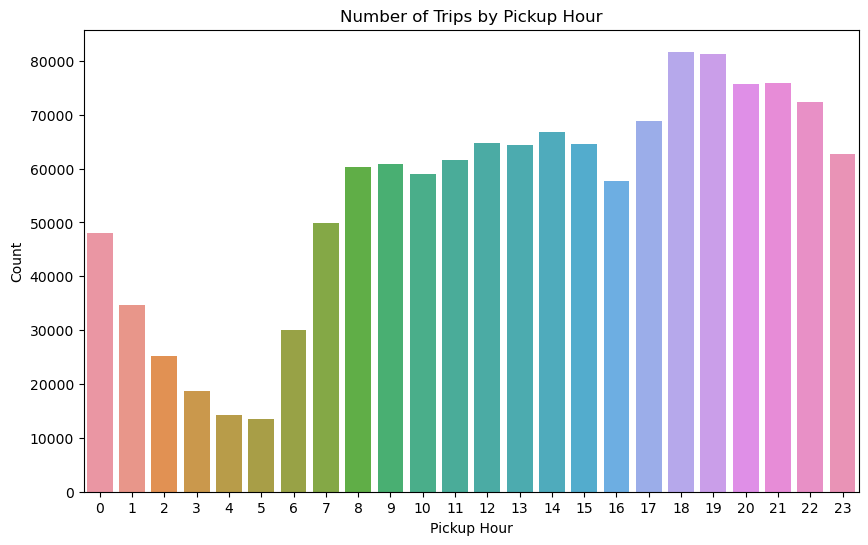

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Bar plot of pickup hour counts
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=X_train)
plt.title('Number of Trips by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Count')
plt.show()

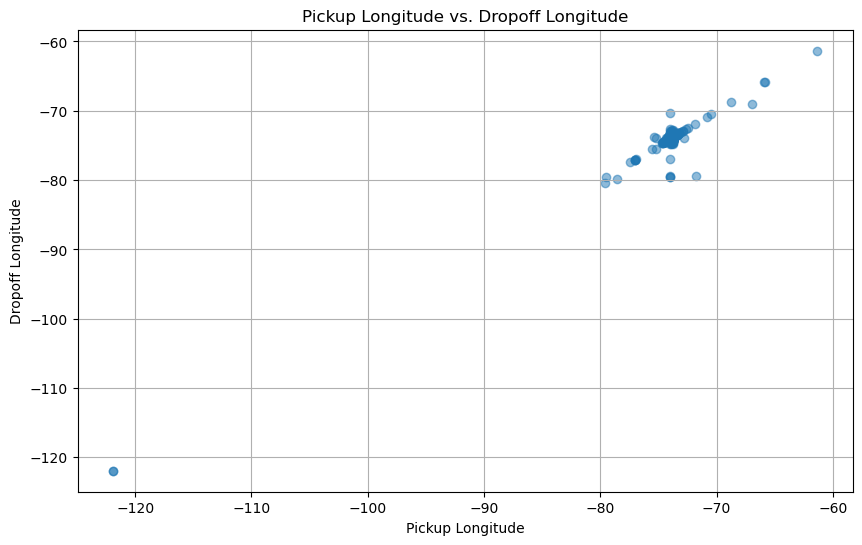

In [10]:
# Get pickup_longitude and dropoff_longitude columns
pickup_longitude = X_train['pickup_longitude']
dropoff_longitude = X_train['dropoff_longitude']

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pickup_longitude, dropoff_longitude, alpha=0.5)
plt.title('Pickup Longitude vs. Dropoff Longitude')
plt.xlabel('Pickup Longitude')
plt.ylabel('Dropoff Longitude')
plt.grid(True)

plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def format_data(X_train,y_train):
    # input features and target data
    input_features = X_train
    target_data = y_train

    # Standardize input features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(input_features)

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(scaled_features, target_data, test_size=0.05, random_state=21)

    # Reshape target data
    y_train = y_train.values.reshape(-1, 1)
    y_val = y_val.values.reshape(-1, 1)

    return X_train, y_train, X_val, y_val


X_train, y_train, X_val, y_val = format_data(X_train,y_train)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)


X_train shape:  (1247140, 13)
y_train shape:  (1247140, 1)
X_val shape:  (65639, 13)
y_val shape:  (65639, 1)


## Running on Model

In [11]:
import matplotlib.pyplot as plt
from regression_train import *
from layers import *
from models import *


Training model with config: [<layers.Linear object at 0x2dc205720>, <layers.Tanh object at 0x2dc2057e0>, <layers.Linear object at 0x2dc205810>], learning rate: 0.001, batch size: 64

Epoch 0/100, Training Loss: 222559.95078967168, Validation Loss: 74934104.80123676
Epoch 1/100, Training Loss: 119397.96484265487, Validation Loss: 74935339.10935462
Epoch 2/100, Training Loss: 176282.6143074346, Validation Loss: 74952616.71125443
Stopping early at epoch 3!


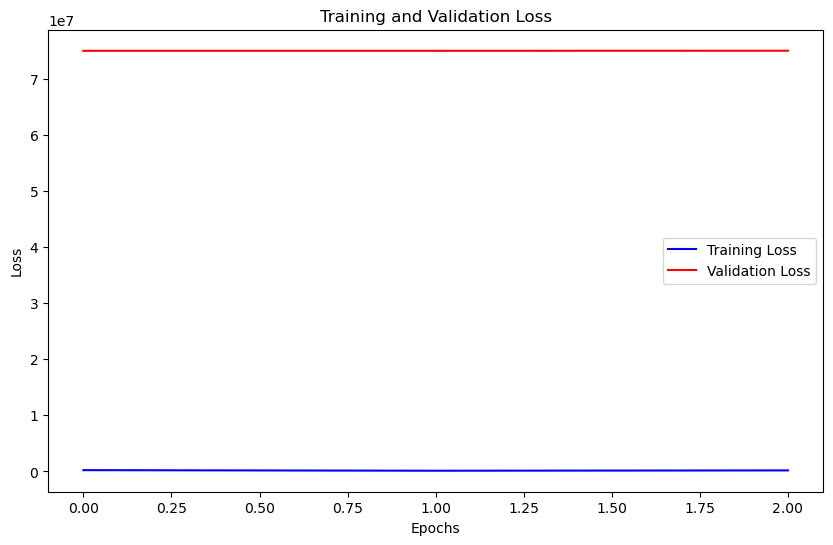

[0.001, 64, 176282.6143074346, 74952616.71125443]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443]]

Training model with config: [<layers.Linear object at 0x2dc205720>, <layers.Tanh object at 0x2dc2057e0>, <layers.Linear object at 0x2dc205810>], learning rate: 0.001, batch size: 128

Epoch 0/100, Training Loss: 211821.0954901989, Validation Loss: 74964553.7506789
Epoch 1/100, Training Loss: 430658.22474640637, Validation Loss: 75056006.09818012
Epoch 2/100, Training Loss: 136404.98454445798, Validation Loss: 74956163.17294207
Epoch 3/100, Training Loss: 118867.47399075885, Validation Loss: 74953665.94722058
Epoch 4/100, Training Loss: 89815.29015657977, Validation Loss: 74944926.5106817
Epoch 5/100, Training Loss: 172188.09846883093, Validation Loss: 74937640.63616796
Epoch 6/100, Training Loss: 163075.14180903288, Validation Loss: 74935900.14507315
Epoch 7/100, Training Loss: 171424.70853088505, Validation Loss: 74911916.7370068
Epoch 8/100, Training Loss: 232105.21670048102, Val

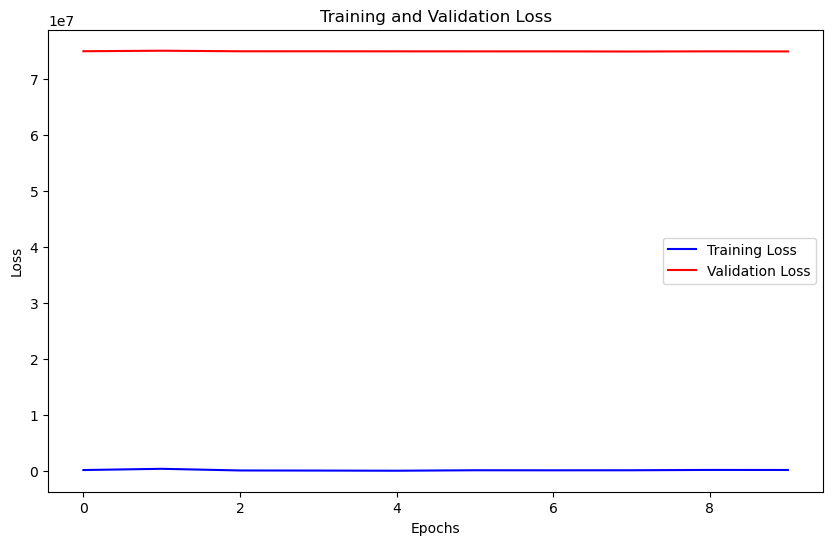

[0.001, 128, 220875.53269693104, 74927529.86036451]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443], [1, 0.001, 128, 220875.53269693104, 74927529.86036451]]

Training model with config: [<layers.Linear object at 0x2dc205720>, <layers.Tanh object at 0x2dc2057e0>, <layers.Linear object at 0x2dc205810>], learning rate: 0.01, batch size: 64

Epoch 0/100, Training Loss: 191063026.3671167, Validation Loss: 80597403.93994336
Epoch 1/100, Training Loss: 193046.8031654238, Validation Loss: 75049320.06025901
Epoch 2/100, Training Loss: 240103.2489894681, Validation Loss: 74992653.7779305
Epoch 3/100, Training Loss: 278495.3628588047, Validation Loss: 74987863.90501027
Epoch 4/100, Training Loss: 153041.99563711602, Validation Loss: 75034730.59801747
Epoch 5/100, Training Loss: 173732.84681972352, Validation Loss: 75016577.26468658
Stopping early at epoch 6!


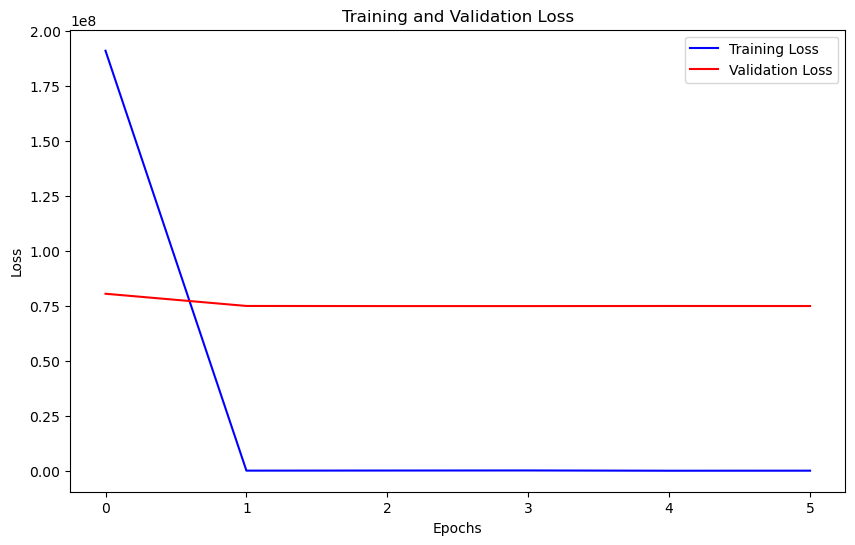

[0.01, 64, 173732.84681972352, 75016577.26468658]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443], [1, 0.001, 128, 220875.53269693104, 74927529.86036451], [1, 0.01, 64, 173732.84681972352, 75016577.26468658]]

Training model with config: [<layers.Linear object at 0x2dc205720>, <layers.Tanh object at 0x2dc2057e0>, <layers.Linear object at 0x2dc205810>], learning rate: 0.01, batch size: 128

Epoch 0/100, Training Loss: 456098.376999703, Validation Loss: 74955681.71203366
Epoch 1/100, Training Loss: 451023.3077351155, Validation Loss: 75012505.7578288
Epoch 2/100, Training Loss: 195336336.26217553, Validation Loss: 76597706.49676223
Stopping early at epoch 3!


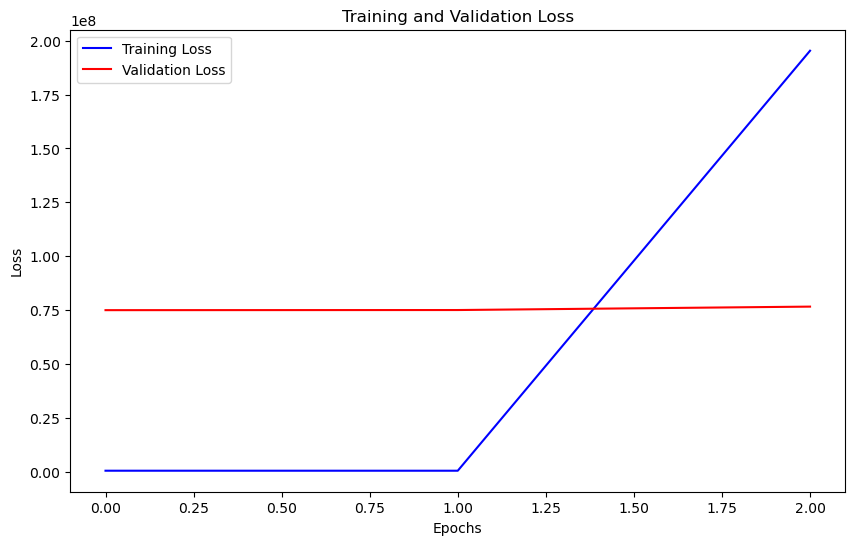

[0.01, 128, 195336336.26217553, 76597706.49676223]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443], [1, 0.001, 128, 220875.53269693104, 74927529.86036451], [1, 0.01, 64, 173732.84681972352, 75016577.26468658], [1, 0.01, 128, 195336336.26217553, 76597706.49676223]]

Training model with config: [<layers.Linear object at 0x2dc205870>, <layers.Tanh object at 0x2dc205750>, <layers.Linear object at 0x2dc2058a0>, <layers.Tanh object at 0x282c136a0>, <layers.Linear object at 0x282c10e50>], learning rate: 0.001, batch size: 64

Epoch 0/100, Training Loss: 211469.32181027567, Validation Loss: 75000440.48233008
Epoch 1/100, Training Loss: 231890.7932388621, Validation Loss: 75023011.08946389
Epoch 2/100, Training Loss: 197498.06808894023, Validation Loss: 75018078.97917119
Stopping early at epoch 3!


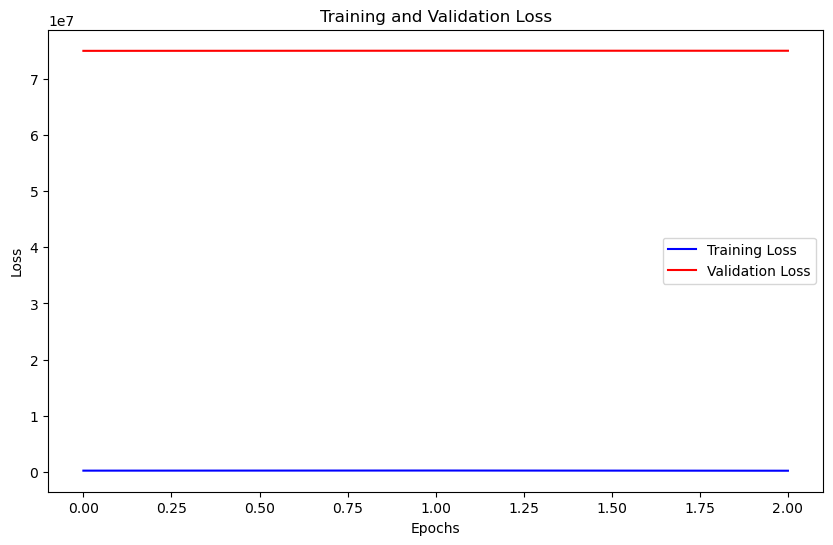

[0.001, 64, 197498.06808894023, 75018078.97917119]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443], [1, 0.001, 128, 220875.53269693104, 74927529.86036451], [1, 0.01, 64, 173732.84681972352, 75016577.26468658], [1, 0.01, 128, 195336336.26217553, 76597706.49676223], [2, 0.001, 64, 197498.06808894023, 75018078.97917119]]

Training model with config: [<layers.Linear object at 0x2dc205870>, <layers.Tanh object at 0x2dc205750>, <layers.Linear object at 0x2dc2058a0>, <layers.Tanh object at 0x282c136a0>, <layers.Linear object at 0x282c10e50>], learning rate: 0.001, batch size: 128

Epoch 0/100, Training Loss: 228513.37358744035, Validation Loss: 74996675.6492657
Epoch 1/100, Training Loss: 219770.9464014433, Validation Loss: 74972019.93487236
Epoch 2/100, Training Loss: 312578.77703542437, Validation Loss: 74971922.41184238
Epoch 3/100, Training Loss: 319626.98280378804, Validation Loss: 74989895.61933224
Epoch 4/100, Training Loss: 126409.46104916009, Validation Loss: 75012387.50945953


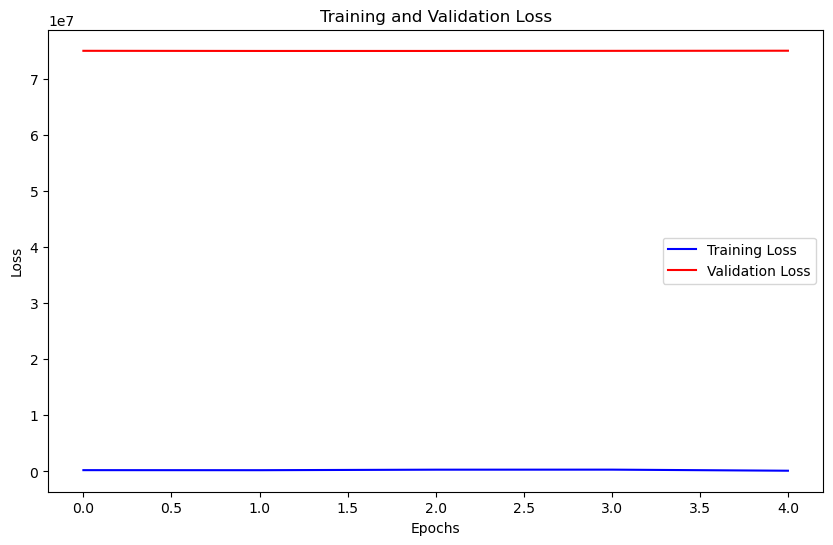

[0.001, 128, 126409.46104916009, 75012387.50945953]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443], [1, 0.001, 128, 220875.53269693104, 74927529.86036451], [1, 0.01, 64, 173732.84681972352, 75016577.26468658], [1, 0.01, 128, 195336336.26217553, 76597706.49676223], [2, 0.001, 64, 197498.06808894023, 75018078.97917119], [2, 0.001, 128, 126409.46104916009, 75012387.50945953]]

Training model with config: [<layers.Linear object at 0x2dc205870>, <layers.Tanh object at 0x2dc205750>, <layers.Linear object at 0x2dc2058a0>, <layers.Tanh object at 0x282c136a0>, <layers.Linear object at 0x282c10e50>], learning rate: 0.01, batch size: 64

Epoch 0/100, Training Loss: 461206.7277998652, Validation Loss: 75069577.25679015
Epoch 1/100, Training Loss: 154530.56975152425, Validation Loss: 75070400.91634245
Epoch 2/100, Training Loss: 226633.11685972457, Validation Loss: 75050207.88208923
Epoch 3/100, Training Loss: 207454.03180582204, Validation Loss: 75071133.58604442
Epoch 4/100, Training Loss:

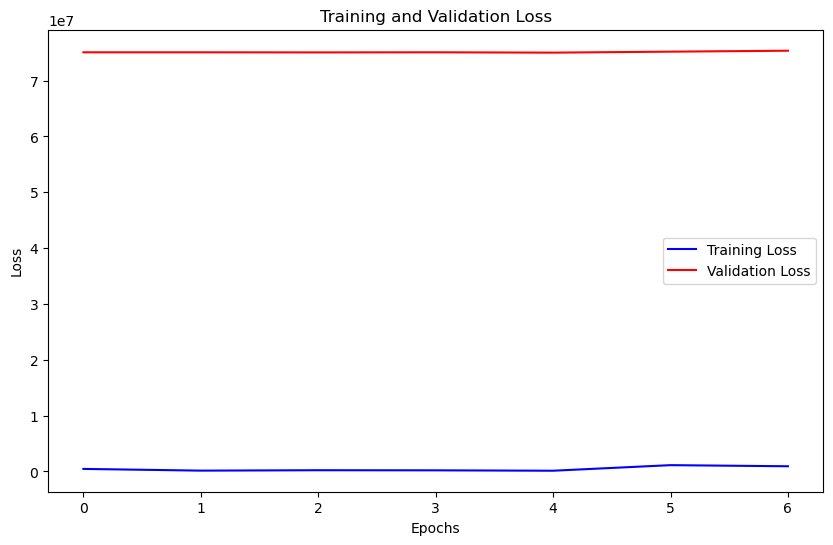

[0.01, 64, 935611.5675990286, 75352576.70100313]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443], [1, 0.001, 128, 220875.53269693104, 74927529.86036451], [1, 0.01, 64, 173732.84681972352, 75016577.26468658], [1, 0.01, 128, 195336336.26217553, 76597706.49676223], [2, 0.001, 64, 197498.06808894023, 75018078.97917119], [2, 0.001, 128, 126409.46104916009, 75012387.50945953], [2, 0.01, 64, 935611.5675990286, 75352576.70100313]]

Training model with config: [<layers.Linear object at 0x2dc205870>, <layers.Tanh object at 0x2dc205750>, <layers.Linear object at 0x2dc2058a0>, <layers.Tanh object at 0x282c136a0>, <layers.Linear object at 0x282c10e50>], learning rate: 0.01, batch size: 128

Epoch 0/100, Training Loss: 258885.4365379265, Validation Loss: 74979933.03720327
Epoch 1/100, Training Loss: 418788.6857229892, Validation Loss: 74984817.44944648
Epoch 2/100, Training Loss: 225043.6497369944, Validation Loss: 75005583.38214989
Stopping early at epoch 3!


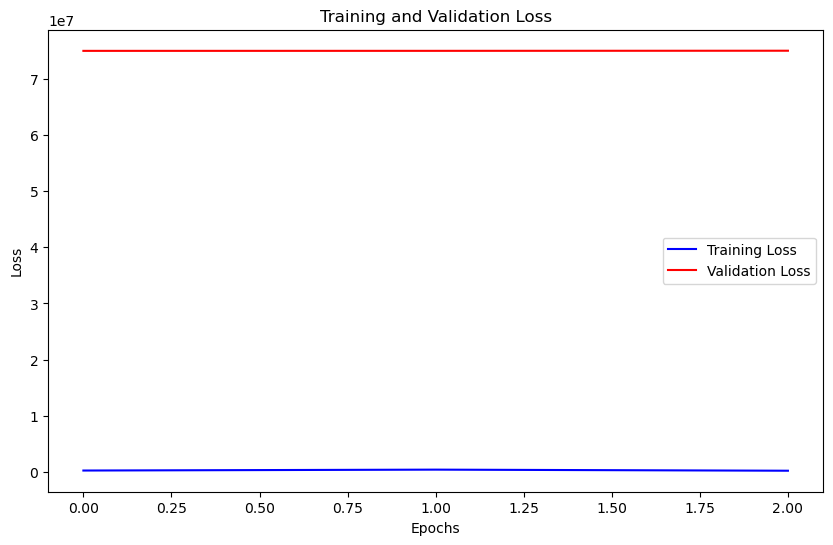

[0.01, 128, 225043.6497369944, 75005583.38214989]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443], [1, 0.001, 128, 220875.53269693104, 74927529.86036451], [1, 0.01, 64, 173732.84681972352, 75016577.26468658], [1, 0.01, 128, 195336336.26217553, 76597706.49676223], [2, 0.001, 64, 197498.06808894023, 75018078.97917119], [2, 0.001, 128, 126409.46104916009, 75012387.50945953], [2, 0.01, 64, 935611.5675990286, 75352576.70100313], [2, 0.01, 128, 225043.6497369944, 75005583.38214989]]

Training model with config: [<layers.Linear object at 0x282c13460>, <layers.Tanh object at 0x2b7bff130>, <layers.Linear object at 0x2a966e890>, <layers.Tanh object at 0x2b7b8fe80>, <layers.Linear object at 0x2a966e7d0>, <layers.Tanh object at 0x2dc205900>, <layers.Linear object at 0x2dc2058d0>, <layers.Tanh object at 0x2dc205240>, <layers.Linear object at 0x2dc205120>], learning rate: 0.001, batch size: 64

Epoch 0/100, Training Loss: 198765.80969490204, Validation Loss: 75096659.75069472
Epoch 1/100, Trai

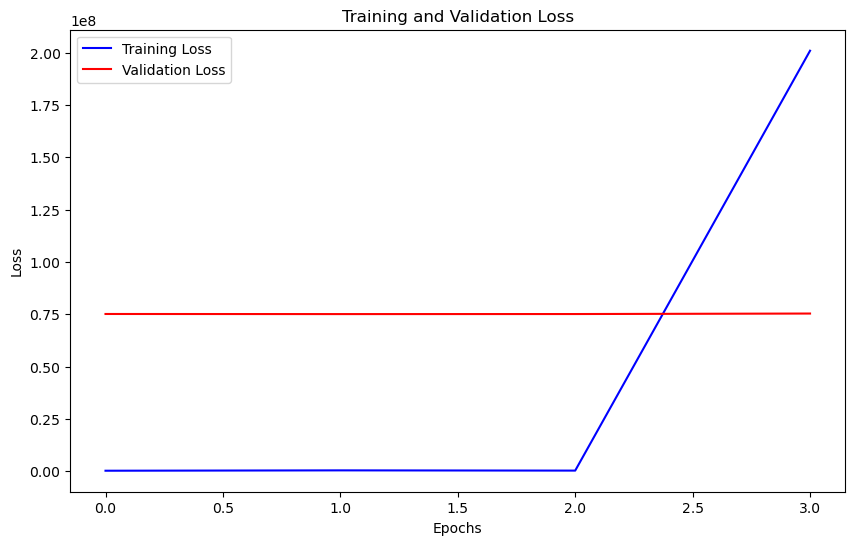

[0.001, 64, 200894356.36958155, 75307395.47538139]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443], [1, 0.001, 128, 220875.53269693104, 74927529.86036451], [1, 0.01, 64, 173732.84681972352, 75016577.26468658], [1, 0.01, 128, 195336336.26217553, 76597706.49676223], [2, 0.001, 64, 197498.06808894023, 75018078.97917119], [2, 0.001, 128, 126409.46104916009, 75012387.50945953], [2, 0.01, 64, 935611.5675990286, 75352576.70100313], [2, 0.01, 128, 225043.6497369944, 75005583.38214989], [3, 0.001, 64, 200894356.36958155, 75307395.47538139]]

Training model with config: [<layers.Linear object at 0x282c13460>, <layers.Tanh object at 0x2b7bff130>, <layers.Linear object at 0x2a966e890>, <layers.Tanh object at 0x2b7b8fe80>, <layers.Linear object at 0x2a966e7d0>, <layers.Tanh object at 0x2dc205900>, <layers.Linear object at 0x2dc2058d0>, <layers.Tanh object at 0x2dc205240>, <layers.Linear object at 0x2dc205120>], learning rate: 0.001, batch size: 128

Epoch 0/100, Training Loss: 261038.97552338

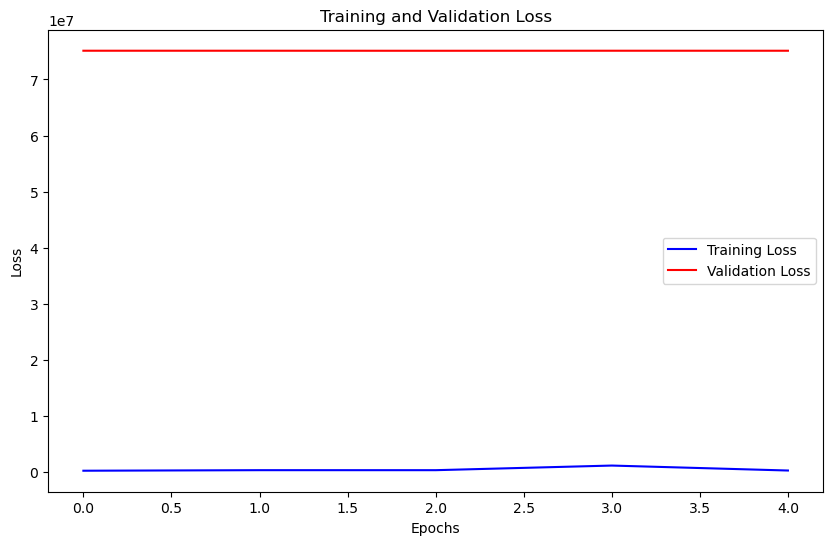

[0.001, 128, 296865.2678428324, 75108824.90199658]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443], [1, 0.001, 128, 220875.53269693104, 74927529.86036451], [1, 0.01, 64, 173732.84681972352, 75016577.26468658], [1, 0.01, 128, 195336336.26217553, 76597706.49676223], [2, 0.001, 64, 197498.06808894023, 75018078.97917119], [2, 0.001, 128, 126409.46104916009, 75012387.50945953], [2, 0.01, 64, 935611.5675990286, 75352576.70100313], [2, 0.01, 128, 225043.6497369944, 75005583.38214989], [3, 0.001, 64, 200894356.36958155, 75307395.47538139], [3, 0.001, 128, 296865.2678428324, 75108824.90199658]]

Training model with config: [<layers.Linear object at 0x282c13460>, <layers.Tanh object at 0x2b7bff130>, <layers.Linear object at 0x2a966e890>, <layers.Tanh object at 0x2b7b8fe80>, <layers.Linear object at 0x2a966e7d0>, <layers.Tanh object at 0x2dc205900>, <layers.Linear object at 0x2dc2058d0>, <layers.Tanh object at 0x2dc205240>, <layers.Linear object at 0x2dc205120>], learning rate: 0.01, batch 

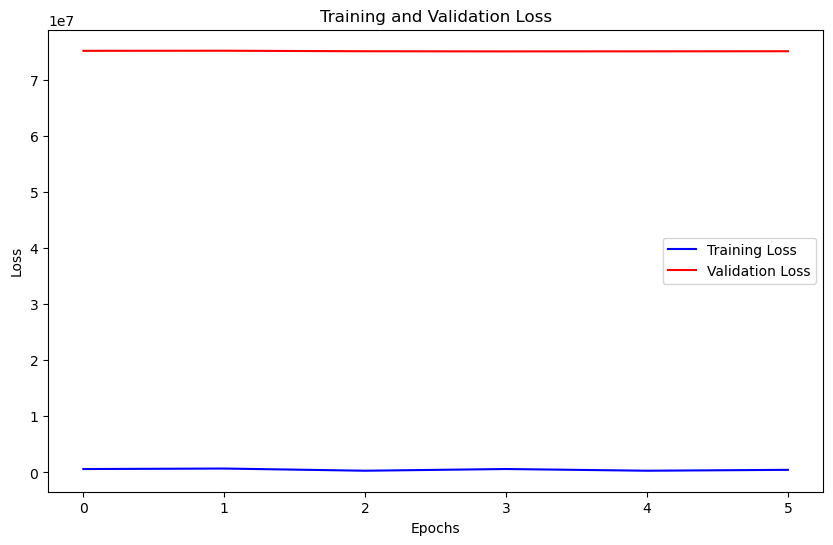

[0.01, 64, 456885.21772522223, 75173487.86573164]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443], [1, 0.001, 128, 220875.53269693104, 74927529.86036451], [1, 0.01, 64, 173732.84681972352, 75016577.26468658], [1, 0.01, 128, 195336336.26217553, 76597706.49676223], [2, 0.001, 64, 197498.06808894023, 75018078.97917119], [2, 0.001, 128, 126409.46104916009, 75012387.50945953], [2, 0.01, 64, 935611.5675990286, 75352576.70100313], [2, 0.01, 128, 225043.6497369944, 75005583.38214989], [3, 0.001, 64, 200894356.36958155, 75307395.47538139], [3, 0.001, 128, 296865.2678428324, 75108824.90199658], [3, 0.01, 64, 456885.21772522223, 75173487.86573164]]

Training model with config: [<layers.Linear object at 0x282c13460>, <layers.Tanh object at 0x2b7bff130>, <layers.Linear object at 0x2a966e890>, <layers.Tanh object at 0x2b7b8fe80>, <layers.Linear object at 0x2a966e7d0>, <layers.Tanh object at 0x2dc205900>, <layers.Linear object at 0x2dc2058d0>, <layers.Tanh object at 0x2dc205240>, <layers.Linear

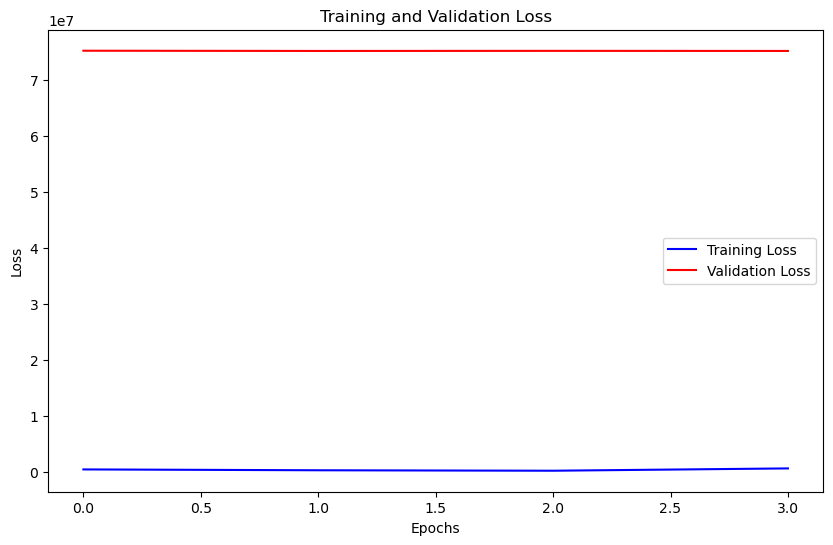

[0.01, 128, 629541.8569570939, 75141843.13469778]
[[1, 0.001, 64, 176282.6143074346, 74952616.71125443], [1, 0.001, 128, 220875.53269693104, 74927529.86036451], [1, 0.01, 64, 173732.84681972352, 75016577.26468658], [1, 0.01, 128, 195336336.26217553, 76597706.49676223], [2, 0.001, 64, 197498.06808894023, 75018078.97917119], [2, 0.001, 128, 126409.46104916009, 75012387.50945953], [2, 0.01, 64, 935611.5675990286, 75352576.70100313], [2, 0.01, 128, 225043.6497369944, 75005583.38214989], [3, 0.001, 64, 200894356.36958155, 75307395.47538139], [3, 0.001, 128, 296865.2678428324, 75108824.90199658], [3, 0.01, 64, 456885.21772522223, 75173487.86573164], [3, 0.01, 128, 629541.8569570939, 75141843.13469778]]


In [40]:
# Different model configurations :
model_configs = [
    [Linear(X_train.shape[1], 128), Tanh(), Linear(128, 1)],
    [Linear(X_train.shape[1], 128), Tanh(), Linear(128, 64), Tanh(), Linear(64, 1)],
    [Linear(X_train.shape[1], 256), Tanh(), Linear(256, 128), Tanh(), Linear(128, 64), Tanh(), Linear(64, 32), Tanh(), Linear(32, 1)]
]
best_model_config = None
best_learning_rate = None
best_batch_size = None
best_model = None
best_validation_loss = float('inf')  # Initialize with infinity

learning_rates = [0.001, 0.01]
batch_sizes = [64, 128]

stats = []
for config in model_configs:
    for lr in learning_rates:
        for bs in batch_sizes:
            print(f"\nTraining model with config: {config}, learning rate: {lr}, batch size: {bs}\n")
            # Initialize neural network model
            model = Sequential(config)
            # Train the model
            result = model_regression_training(model, X_train, y_train, X_val, y_val, learning_rate=lr, batch_size=bs)
            print(result)
            # Collect and store current training statistics
            current_stat = [int(model_configs.index(config) + 1)] + result
            stats.append(current_stat)
            print(stats)

            if result[-1] < best_validation_loss:
                best_validation_loss = result[-1]
                best_model_config = config
                best_learning_rate = lr
                best_batch_size = bs
                best_model = model
                
#Storing bestmodel in pickle file               
best_model.save("best_model.pkl")


In [41]:
# display stats
stats

[[1, 0.001, 64, 176282.6143074346, 74952616.71125443],
 [1, 0.001, 128, 220875.53269693104, 74927529.86036451],
 [1, 0.01, 64, 173732.84681972352, 75016577.26468658],
 [1, 0.01, 128, 195336336.26217553, 76597706.49676223],
 [2, 0.001, 64, 197498.06808894023, 75018078.97917119],
 [2, 0.001, 128, 126409.46104916009, 75012387.50945953],
 [2, 0.01, 64, 935611.5675990286, 75352576.70100313],
 [2, 0.01, 128, 225043.6497369944, 75005583.38214989],
 [3, 0.001, 64, 200894356.36958155, 75307395.47538139],
 [3, 0.001, 128, 296865.2678428324, 75108824.90199658],
 [3, 0.01, 64, 456885.21772522223, 75173487.86573164],
 [3, 0.01, 128, 629541.8569570939, 75141843.13469778]]

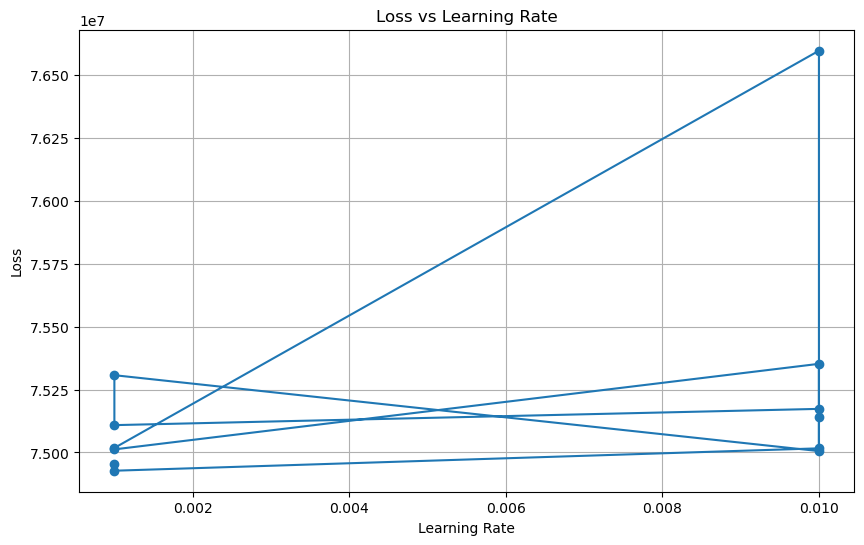

In [42]:
import matplotlib.pyplot as plt
# Extract learning rates and losses
learning_rates = [entry[1] for entry in stats]
losses = [entry[4] for entry in stats]

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, losses, marker='o', linestyle='-')
plt.title('Loss vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [43]:
#Find the minimum validation loss
min_val_loss = float('inf')
min_val_loss_row = None

# Iterate over each row in stats to find the minimum validation loss
for row in stats:
    if row[-1] < min_val_loss:  
        min_val_loss = row[-1]  
        min_val_loss_row = row  

# Display the row with the minimum validation loss
print("Row with Minimum Validation Loss:")
print(min_val_loss_row)

Row with Minimum Validation Loss:
[1, 0.001, 128, 220875.53269693104, 74927529.86036451]


In [35]:
from sklearn.metrics import mean_squared_error
#Loading the best model 
model=Sequential()
model=model.load("best_model.pkl")


In [36]:
# To find predictions on test set
def get_predictions(model, X_test):
    predictions = model.forward(X_test)
    return predictions

In [41]:
#To find mean squared error
def mse(y_true, y_pred):
    return mean_squared_error(y_true,y_pred)


In [42]:
# Test Accuracy 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_test)
predictions = get_predictions(model,scaled_features)
mse = mse(y_test,predictions)

print("MSE:", mse)

MSE: 10824939.194169391
